***
# Plots for the EXCESS Summary paper
***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm.auto import trange
import matplotlib.patches as patches
%config InlineBackend.figure_formats = ['svg']  # this is needed for the plots in a jupyter notebook

In [2]:
fontsize = 12

mpl.rcParams['xtick.labelsize'] = fontsize
mpl.rcParams['ytick.labelsize'] = fontsize
mpl.rcParams['font.size'] = fontsize
mpl.rcParams['axes.titlesize'] = fontsize
mpl.rcParams['axes.labelsize'] = fontsize
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['legend.fontsize'] = fontsize
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
linestyles = ['solid', 'dashed']

In [5]:
paths_data_unbinned = [
    'data/converted_data/Nucleus/Nucleus_all.txt',
    'data/converted_data/SuperCDMS/CPD/CPD.txt',
    'data/converted_data/CRESST/CRESST.txt',
    'data/converted_data/DAMIC/DAMIC.txt',
    'data/converted_data/SuperCDMS/HVeV/Run1/Run1.txt',
    'data/converted_data/SuperCDMS/HVeV/Run2/Run2.txt',
    'data/converted_data/CONNIE/CONNIE.txt',
]
paths_efficiencies_unbinned = [
    'data/converted_data/Nucleus/Nucleus_all_eff.txt',
    'data/converted_data/SuperCDMS/CPD/CPD_eff.txt',
    'data/converted_data/CRESST/CRESST_eff.txt',
    'data/converted_data/DAMIC/DAMIC_eff.txt',
    'data/converted_data/SuperCDMS/HVeV/Run1/Run1_eff.txt',
    'data/converted_data/SuperCDMS/HVeV/Run2/Run2_eff.txt',
    'data/converted_data/CONNIE/CONNIE_eff.txt',
]
paths_exposures_unbinned = [
    'data/converted_data/Nucleus/Nucleus_all_exposure.txt',
    'data/converted_data/SuperCDMS/CPD/CPD_exposure.txt',
    'data/converted_data/CRESST/CRESST_exposure.txt',
    'data/converted_data/DAMIC/DAMIC_exposure.txt',
    'data/converted_data/SuperCDMS/HVeV/Run1/Run1_exposure.txt',
    'data/converted_data/SuperCDMS/HVeV/Run2/Run2_exposure.txt',
    'data/converted_data/CONNIE/CONNIE_exposure.txt',
]
paths_weights_unbinned = [
    'data/converted_data/Nucleus/Nucleus_all_weight.txt',
    'data/converted_data/SuperCDMS/CPD/CPD_weight.txt',
    'data/converted_data/CRESST/CRESST_weight.txt',
    'data/converted_data/DAMIC/DAMIC_weight.txt',
    'data/converted_data/SuperCDMS/HVeV/Run1/Run1_weight.txt',
    'data/converted_data/SuperCDMS/HVeV/Run2/Run2_weight.txt',
    'data/converted_data/CONNIE/CONNIE_weight.txt',
]
names_unbinned = [
    'Nucleus-1g-prototype',
    'SuperCDMS-CPD-ROI',
    'CRESST-III',
    'DAMIC',
    'SuperCDMS-HVeV-Run1',
    'SuperCDMS-HVeV-Run2',
    'Skipper-CCD@surface@FNAL',
]

paths_data_binned = [
    'data/converted_data/Edelweiss/RED20.txt',
    'data/converted_data/Edelweiss/RED30.txt',
    'data/converted_data/Edelweiss/RED30_keVee.txt',
    'data/converted_data/SENSEI/SENSEI.txt',
    'data/converted_data/DAMIC/DAMIC_nobck.txt',
    'data/converted_data/MINER/MINER_sapphire_with_ss.txt',
    'data/converted_data/MINER/MINER_sapphire_without_cut.txt',
    'data/converted_data/SuperCDMS/CPD/CPD_binned.txt',
    'data/converted_data/MINER/MINER_sapphire_paper.txt',
]
paths_efficiencies_binned = [
    'data/converted_data/Edelweiss/RED20_eff.txt',
    'data/converted_data/Edelweiss/RED30_eff.txt',
    'data/converted_data/Edelweiss/RED30_keVee_eff.txt',
    'data/converted_data/SENSEI/SENSEI_eff.txt',
    'data/converted_data/DAMIC/DAMIC_eff.txt',
    'data/converted_data/MINER/MINER_eff.txt',
    'data/converted_data/MINER/MINER_eff.txt',
    'data/converted_data/SuperCDMS/CPD/CPD_binned_eff.txt',
    'data/converted_data/MINER/MINER_eff.txt',
]
paths_exposures_binned = [
    'data/converted_data/Edelweiss/RED20_exposure.txt',
    'data/converted_data/Edelweiss/RED30_exposure.txt',
    'data/converted_data/Edelweiss/RED30_keVee_exposure.txt',
    'data/converted_data/SENSEI/SENSEI_exposure.txt',
    'data/converted_data/DAMIC/DAMIC_exposure.txt',
    'data/converted_data/MINER/MINER_exposure.txt',
    'data/converted_data/MINER/MINER_exposure.txt',
    'data/converted_data/SuperCDMS/CPD/CPD_binned_exposure.txt',
    'data/converted_data/MINER/MINER_exposure.txt',
]
paths_weights_binned = [
    'data/converted_data/Edelweiss/RED20_weight.txt',
    'data/converted_data/Edelweiss/RED30_weight.txt',
    'data/converted_data/Edelweiss/RED30_weight.txt',
    'data/converted_data/SENSEI/SENSEI_weight.txt',
    'data/converted_data/DAMIC/DAMIC_weight.txt',
    'data/converted_data/MINER/MINER_Sapphire_weight.txt',
    'data/converted_data/MINER/MINER_Sapphire_weight.txt',
    'data/converted_data/SuperCDMS/CPD/CPD_weight.txt',
    'data/converted_data/MINER/MINER_Sapphire_weight.txt',
]
names_binned = [
    'Edelweiss-RED20@surface',
    'Edelweiss-RED30@LSM',
    'Edelweiss-RED30@LSM-keVee',
    'SENSEI',
    'DAMIC_bck_subtracted',
    'MINER_Sapphire_after_cut',
    'MINER_Sapphire_before_cut',
    'SuperCDMS-CPD',
    'MINER_Sapphire_paper'
]

assert len(paths_data_unbinned) == len(paths_efficiencies_unbinned) == len(paths_exposures_unbinned) == len(paths_weights_unbinned) == len(names_unbinned), "Please put for each data path a corresponding efficiency and exposure path and name of the experiment (unbinned data)!"
assert len(paths_data_binned) == len(paths_efficiencies_binned) == len(paths_exposures_binned) == len(paths_weights_binned) == len(names_binned), "Please put for each data path a corresponding efficiency and exposure path and name of the experiment (binned data)!"


9
9
9
9
9


In [6]:
data = {n: np.loadtxt(p) for n, p in zip(names_unbinned, paths_data_unbinned)}
efficiencies = {n: np.loadtxt(p) for n, p in zip(names_unbinned, paths_efficiencies_unbinned)}
exposures = {n: np.loadtxt(p) for n, p in zip(names_unbinned, paths_exposures_unbinned)}
weights = {n: np.loadtxt(p) for n, p in zip(names_unbinned, paths_weights_unbinned)}

for n, p, eff, exp, w in zip(names_binned, paths_data_binned, paths_efficiencies_binned, paths_exposures_binned, paths_weights_binned):
    data[n] = np.loadtxt(p)
    efficiencies[n] = np.loadtxt(eff)
    exposures[n] = np.loadtxt(exp)
    weights[n] = np.loadtxt(w)
    if len(exposures[n].shape) > 0:
        exposures[n] = exposures[n][:,1]
    if len(weights[n].shape) > 0:
        weights[n] = weights[n][:,1]

## Total energy spectra

In [8]:
# experiments
print(names_unbinned[0])  # 0
print(names_unbinned[1])  # 1
print(names_unbinned[2])  # 2
print(names_binned[0])  # 7
# print(names_binned[6])  # 13
# print(names_binned[8])  # 15
print(names_binned[8])

Nucleus-1g-prototype
SuperCDMS-CPD-ROI
CRESST-III
Edelweiss-RED20@surface
MINER_Sapphire_paper


In [9]:
def plot_totals(square=True, xup=1.9, xdown=0.001, ylim=None, savepath=None):

    if square:
        mpl.rcParams['figure.figsize'] = (10, 4)
        mpl.rcParams['xtick.labelsize'] = 12
        mpl.rcParams['ytick.labelsize'] = 12
    else:
        mpl.rcParams['figure.figsize'] = (2.8, 2.2)
        mpl.rcParams['xtick.labelsize'] = 9
        mpl.rcParams['ytick.labelsize'] = 9
    colors = ['C0','C1','C2','C3','C4', ]# ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99']
    ax = plt.gca()

    # cresst
    num = 70
    xlog = True
    label = 'CRESST-III DetA'
    if xlog:
        bins = np.logspace(np.log10(0.01),np.log10(xup+0.2),num=num)  # np.arange(0,0.5,bw)
        bw = np.diff(bins) # 0.003
    else:
        bw = 0.003
        bins = np.arange(0,0.5,bw)
    name = names_unbinned[2]
    print(name, label)
    counts, bins = np.histogram(data[name], bins=bins)
    eff = np.interp(bins[:-1], efficiencies[name][:,0], efficiencies[name][:,1])[np.argmax(counts > 0):]
    plt.step(bins[np.argmax(counts > 0):-1], counts[np.argmax(counts > 0):]/bw[np.argmax(counts > 0):]/exposures[name]/eff, 
             label=label, where='post', color='C5')   
    
    # edelweiss
    label = 'EDELWEISS RED20'
    name = names_binned[0]
    print(name, label)
    counts = data[name][:, 2]
    bins = np.concatenate((data[name][:, 0], [data[name][-1, 1]]))
    eff = np.interp(bins[:-1], efficiencies[name][:,0], efficiencies[name][:,1])
    plt.step(bins[np.argmax(counts > 0):-1], counts[np.argmax(counts > 0):]/exposures[name]/eff, 
             label=label, where='post', color='C0')
    
#     # miner germanium
#     label = 'MINER Germanium'
#     name = names_binned[6]
#     print(name, label)
#     counts = data[name][:, 2]
#     bins = np.concatenate((data[name][:, 0], [data[name][-1, 1]]))
#     eff = np.interp(bins[:-1], efficiencies[name][:,0], efficiencies[name][:,1])[np.argmax(counts > 0):]
#     plt.step(bins[np.argmax(counts > 0):-1], counts[np.argmax(counts > 0):]/exposures[name]/eff, 
#              label=label, where='post', color='C2')
    
#     # miner sapphire
#     label = 'MINER Sapphire'
#     name = names_binned[8]
#     print(name, label)
#     counts = data[name][:, 2]
#     bins = np.concatenate((data[name][:, 0], [data[name][-1, 1]]))
#     eff = np.interp(bins[:-1], efficiencies[name][:,0], efficiencies[name][:,1])[np.argmax(counts > 0):]
#     plt.step(bins[np.argmax(counts > 0):-1], counts[np.argmax(counts > 0):]/exposures[name]/eff, 
#              label=label, where='post', color='C1')
    
    # miner sapphire
    thres = 0.2
    label = 'MINER Sapphire'
    name = names_binned[8]
    print(name, label)
    counts = data[name][data[name][:, 0] >= thres, 2]  # threshold at 200 eV
    bins = np.concatenate((data[name][data[name][:, 0] >= thres, 0], [data[name][-1, 1]]))
    eff = np.interp(bins[:-1], efficiencies[name][:,0], efficiencies[name][:,1])[np.argmax(counts > 0):]
    plt.step(bins[np.argmax(counts > 0):-1], counts[np.argmax(counts > 0):]/exposures[name]/eff, 
             label=label, where='post', color='C1')

#     # superCDMS
#     label = 'SuperCDMS CPD'
#     name = names_binned[9]
#     print(name, label)
#     counts = data[name][:, 2]
#     bins = np.concatenate((data[name][:, 0], [data[name][-1, 1]]))
#     eff = np.interp(bins[:-1], efficiencies[name][:,0], efficiencies[name][:,1])[np.argmax(counts > 0):]
#     plt.step(bins[np.argmax(counts > 0):-1], counts[np.argmax(counts > 0):]/exposures[name]/eff, 
#              label=label, where='post')

    # nucleus
    num = 90
    xlog = True
    label = 'NUCLEUS 1g prototype'
    if xlog:
        bins = np.logspace(np.log10(xdown),np.log10(xup+0.2),num=num)  # np.arange(0,0.5,bw)
        bw = np.diff(bins) # 0.003
    else:
        bw = 0.003
        bins = np.arange(xdown,xup,bw)
    name = names_unbinned[0]
    print(name, label)
    counts, bins = np.histogram(data[name], bins=bins)
    eff = np.interp(bins[:-1], efficiencies[name][:,0], efficiencies[name][:,1])[np.argmax(counts > 0):]
    plt.step(bins[np.argmax(counts > 0):-1], counts[np.argmax(counts > 0):]/bw[np.argmax(counts > 0):]/exposures[name]/eff, 
             label=label, where='post', color='C4')

    # superCDMS
    num = 90
    xlog = True
    label = 'SuperCDMS CPD'
    if xlog:
        bins = np.logspace(np.log10(xdown),np.log10(xup+0.2),num=num)  # np.arange(0,0.5,bw)
        bw = np.diff(bins) # 0.003
    else:
        bw = 0.003
        bins = np.arange(xdown,xup,bw)
    name = names_unbinned[1]
    print(name, label)
    counts, bins = np.histogram(data[name], bins=bins)
    eff = np.interp(bins[:-1], efficiencies[name][:,0], efficiencies[name][:,1])[np.argmax(counts > 0):]
    plt.step(bins[np.argmax(counts > 0):-1], counts[np.argmax(counts > 0):]/bw[np.argmax(counts > 0):]/exposures[name]/eff, 
             label=label, where='post', color='C3')
    
    if square:
        # Create a Rectangle patch
        rect = patches.Rectangle((0.01, 1e1), 0.15, 2e10, linewidth=1, edgecolor='grey', linestyle='dotted', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

    if square:
        plt.ylabel('Event Rate (Counts / kg / day / keV)')
        plt.xlabel('Total energy deposition (keV)')
    plt.yscale('log')
    plt.xlim(xdown,xup)
    if ylim is not None:
        plt.ylim(ylim)
    if square:
        plt.legend(bbox_to_anchor=(1.05, 1.), loc='upper left', borderaxespad=0., frameon=False)
    plt.tight_layout()
    if savepath is not None:
        plt.savefig(savepath)
    plt.show()

CRESST-III CRESST-III DetA
Edelweiss-RED20@surface EDELWEISS RED20
MINER_Sapphire_paper MINER Sapphire
Nucleus-1g-prototype NUCLEUS 1g prototype
SuperCDMS-CPD-ROI SuperCDMS CPD


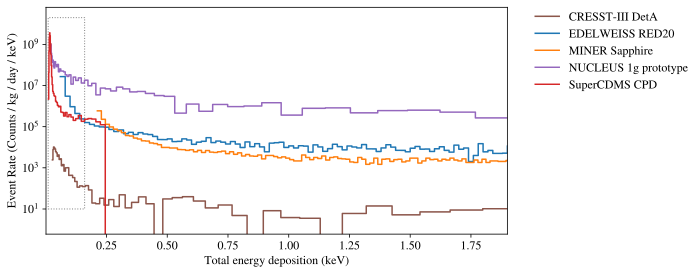

In [10]:
plot_totals(square=True, xup=1.9, xdown=0.001, savepath='plots/total_high.pdf')

CRESST-III CRESST-III DetA
Edelweiss-RED20@surface EDELWEISS RED20
MINER_Sapphire_paper MINER Sapphire
Nucleus-1g-prototype NUCLEUS 1g prototype
SuperCDMS-CPD-ROI SuperCDMS CPD


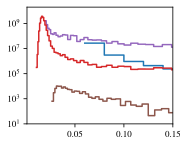

In [11]:
plot_totals(square=False, xup=0.15, xdown=0.001, ylim=(1e1,2e10), savepath='plots/total_low.pdf')

## Electron equivalent spectra

In [16]:
# experiments
print(names_binned[2])
print(names_binned[3])
print(names_unbinned[3])
print(names_unbinned[4])
print(names_unbinned[5])
print(names_unbinned[6])

Edelweiss-RED30@LSM-keVee
SENSEI
DAMIC
SuperCDMS-HVeV-Run1
SuperCDMS-HVeV-Run2
Skipper-CCD@surface@FNAL


In [38]:
def plot_ee(square=True, xup=1.9, xdown=0.001, ylim=None, savepath=None):

    if square:
        mpl.rcParams['figure.figsize'] = (10, 4)
        mpl.rcParams['xtick.labelsize'] = 12
        mpl.rcParams['ytick.labelsize'] = 12
    else:
        mpl.rcParams['figure.figsize'] = (2.8, 2.2)
        mpl.rcParams['xtick.labelsize'] = 9
        mpl.rcParams['ytick.labelsize'] = 9
        
    colors = ['C0','C1','C2','C3','C4', ]# ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99']
    ax = plt.gca()

    # Damic
    num = 70
    xlog = True
    label = 'DAMIC'
    if xlog:
        bins = np.logspace(np.log10(xdown),np.log10(xup+0.2),num=num)  # np.arange(0,0.5,bw)
        bw = np.diff(bins) # 0.003
    else:
        bw = 0.003
        bins = np.arange(xdown,xup,bw)
    name = names_unbinned[3]
    counts, bins = np.histogram(data[name], bins=bins)
    eff = np.interp(bins[:-1], efficiencies[name][:,0], efficiencies[name][:,1])[np.argmax(counts > 0):]
    plt.step(bins[np.argmax(counts > 0):-1], counts[np.argmax(counts > 0):]/bw[np.argmax(counts > 0):]/exposures[name]/eff, 
             label=label, where='post', color='C1')
    
    # Edelweiss
    label = 'EDELWEISS RED30'
    name = names_binned[2]
    counts = data[name][:, 2]
    bins = np.concatenate((data[name][:, 0], [data[name][-1, 1]]))
    eff = np.interp(bins[:-1], efficiencies[name][:,0], efficiencies[name][:,1])
    plt.step(bins[np.argmax(counts > 0):-1], counts[np.argmax(counts > 0):]/exposures[name]/eff, 
             label=label, where='post', color='C0')

    # Sensei
    label = 'SENSEI'
    name = names_binned[3]
    counts = data[name][:, 2]
    bins = np.concatenate((data[name][:, 0], [data[name][-1, 1]]))
    eff = np.interp(bins[:-1], efficiencies[name][:,0], efficiencies[name][:,1])[np.argmax(counts > 0):]
    plt.step(bins[np.argmax(counts > 0):-1], counts[np.argmax(counts > 0):]/exposures[name]/eff, 
             label=label, where='post', color='C2')

    # Skipper
    num = 40
    xlog = True
    label = 'Skipper-CCD'
    if xlog:
        bins = np.logspace(np.log10(xdown),np.log10(xup+0.2),num=num)  # np.arange(0,0.5,bw)
        bw = np.diff(bins) # 0.003
    else:
        bw = 0.003
        bins = np.arange(0,0.5,bw)
    name = names_unbinned[6]
    counts, bins = np.histogram(data[name], bins=bins)
    eff = np.interp(bins[:-1], efficiencies[name][:,0], efficiencies[name][:,1])[np.argmax(counts > 0):]
    plt.step(bins[np.argmax(counts > 0):-1], counts[np.argmax(counts > 0):]/bw[np.argmax(counts > 0):]/exposures[name]/eff, 
             label=label, where='post', color='C4')
    
    # SuperCDMS
    num = 90
    xlog = True
    label = 'SuperCDMS HVeV Run 1'
    if xlog:
        bins = np.logspace(np.log10(xdown),np.log10(xup+0.2),num=num)  # np.arange(0,0.5,bw)
        bw = np.diff(bins) # 0.003
    else:
        bw = 0.003
        bins = np.arange(xdown,xup,bw)
    name = names_unbinned[4]
    counts, bins = np.histogram(data[name], bins=bins)
    eff = np.interp(bins[:-1], efficiencies[name][:,0], efficiencies[name][:,1])[np.argmax(counts > 0):]
    plt.step(bins[np.argmax(counts > 0):-1], counts[np.argmax(counts > 0):]/bw[np.argmax(counts > 0):]/exposures[name]/eff, 
             label=label, where='post', color='C3')
    
    # SuperCDMS
    num = 90
    xlog = True
    label = 'SuperCDMS HVeV Run 2'
    if xlog:
        bins = np.logspace(np.log10(xdown),np.log10(xup+0.2),num=num)  # np.arange(0,0.5,bw)
        bw = np.diff(bins) # 0.003
    else:
        bw = 0.003
        bins = np.arange(xdown,xup,bw)
    name = names_unbinned[5]
    counts, bins = np.histogram(data[name], bins=bins)
    # counts = counts/100 # conversion total energy --> electron hole pairs
    # counts *= 3.8 # conversion electron hole pairs --> recoil energy
    eff = np.interp(bins[:-1], efficiencies[name][:,0], efficiencies[name][:,1])[np.argmax(counts > 0):]
    plt.step(bins[np.argmax(counts > 0):-1], counts[np.argmax(counts > 0):]/bw[np.argmax(counts > 0):]/exposures[name]/eff, 
             label=label, where='post', color='C5') 

    if square:
        # Create a Rectangle patch
        rect = patches.Rectangle((0, 5), 0.08, 2e12, linewidth=1, edgecolor='grey', linestyle='dotted', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

    if square:
        plt.ylabel('Event Rate (Counts / kg / day / keV$_\mathregular{ee}$)')
        plt.xlabel('Electron equivalent energy deposition (keV)')
    plt.yscale('log')
    plt.xlim(xdown,xup)
    if ylim is not None:
        plt.ylim(ylim)
    if square:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon=False)
    plt.tight_layout()
    if savepath is not None:
        plt.savefig(savepath)
    plt.show()

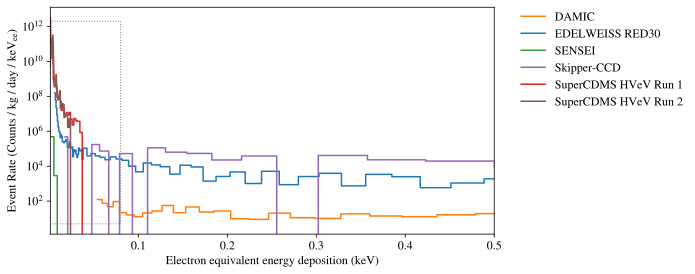

In [39]:
plot_ee(square=True, xup=.5, xdown=0.001, savepath='plots/ee_high.pdf')

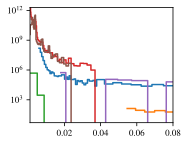

In [40]:
plot_ee(square=False, xup=0.08, xdown=0.001, ylim=(5,2e12), savepath='plots/ee_low.pdf')

Done.